Graf przedstawia sieć interakcji społecznych wśród grupy dzikich zebr Grevy'ego (Equus grevyi), obserwowanych na farmie Mpala w Kenii w 2002 roku.



źródło danych: https://networks.skewed.de/net/zebras

Ramki zostały manualnie zmienione (dodane kolumny sex i bond) na podstawie artykułu o przeprowadzonym badaniu (https://sci-hub.st/10.1007/s00442-006-0553-6), by móc dodać odpowiednie dodatkowe atrybuty do grafu. Dodana została też przeze mnie w ramach rozrywki kolumna name, ale finalnie nie została użyta.

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [3]:
zebras_edges = pd.read_csv("C:\\Users\\Zosia\\Desktop\\network.csv\\edges.csv")
zebras_edges.head()

,# source,target,bond
0,0,1,basic
1,0,2,basic
2,0,3,basic
3,0,4,basic
4,0,5,strong


In [5]:
zebras_nodes = pd.read_csv("C:\\Users\\Zosia\\Desktop\\network.csv\\nodes_plus_names.csv")
zebras_nodes.head()

,# index,_pos,name,sex
0,0,"array([0.46118528, 1.25516749])",MARIA,lactating female
1,1,"array([0.46435762, 1.20703345])",STEFANIA,lactating female
2,2,"array([0.37508564, 1.17892283])",ROBERTA,nonlactating female
3,3,"array([0.49792822, 1.16453374])",STACY,male
4,4,"array([0.59977037, 1.19142726])",MARTA,lactating female


In [7]:
zebras_graph = nx.from_pandas_edgelist(zebras_edges, "# source", " target", edge_attr="bond")

In [16]:
node_labels_dict = zebras_nodes.set_index("# index")[" name"].to_dict()
nx.relabel_nodes(zebras_graph, node_labels_dict, copy=False) # zmiana nazw wierzchołków na podstawie słownika
#finalnie ta część kodu nie została użyta - tylko potem przy ustawianiu wierzchołków

In [10]:
# Create a dictionary to map bond types to edge colors
bond_color_map = {"strong": "black", "basic": "lightgray"}

# Calculate edge colors based on the "bond" column
edge_colors = [bond_color_map[bond] for bond in zebras_edges["bond"]]

# Add edge colors to the graph
nx.set_edge_attributes(zebras_graph,  edge_colors, "edge_color")



In [12]:
# wielkości wierzchołków w zależności od stopnia wierzchołka
node_degree = dict(zebras_graph.degree())
node_size = np.array([node_degree[n] for n in zebras_graph.nodes()])

# kolory wierzchołków w zależności od płci
zebras_nodes[' sex'] = zebras_nodes[' sex'].str.lower()
node_colors_dict = {"lactating female": "darkblue", "nonlactating female": "steelblue", "male": "black"}
node_colors = [node_colors_dict[sex] for sex in zebras_nodes[' sex']]

In [17]:
# ręcznie ustawione niektóre pozycje wierzchołków dla lepszej czytelności
pos = nx.kamada_kawai_layout(zebras_graph)
pos['LORD'][0] = -0.96481566
pos['LORD'][1] = 0.1379865
pos['LADY'][0] = -0.65821753
pos['LADY'][1] = 0.38367742
pos['DUKE'][0] = -0.5
pos['DUKE'][1] = 0.1379865
pos['HANK'][0] = -0.65821753
pos['HANK'][1] = -0.03867742
pos['ROBERTA'][1] -= 0.5
pos['STACY'][1] -= 0.6
pos['VICTORIA'][1] -= 0.5
pos['ZOOMER'][1] -= 0.4
pos['DIESEL'][1] -= 0.5
pos['CASPER'][1] -= 0.1
pos['MARTA'][1] -= 0.1
pos['MARTA'][1] -= 0.1


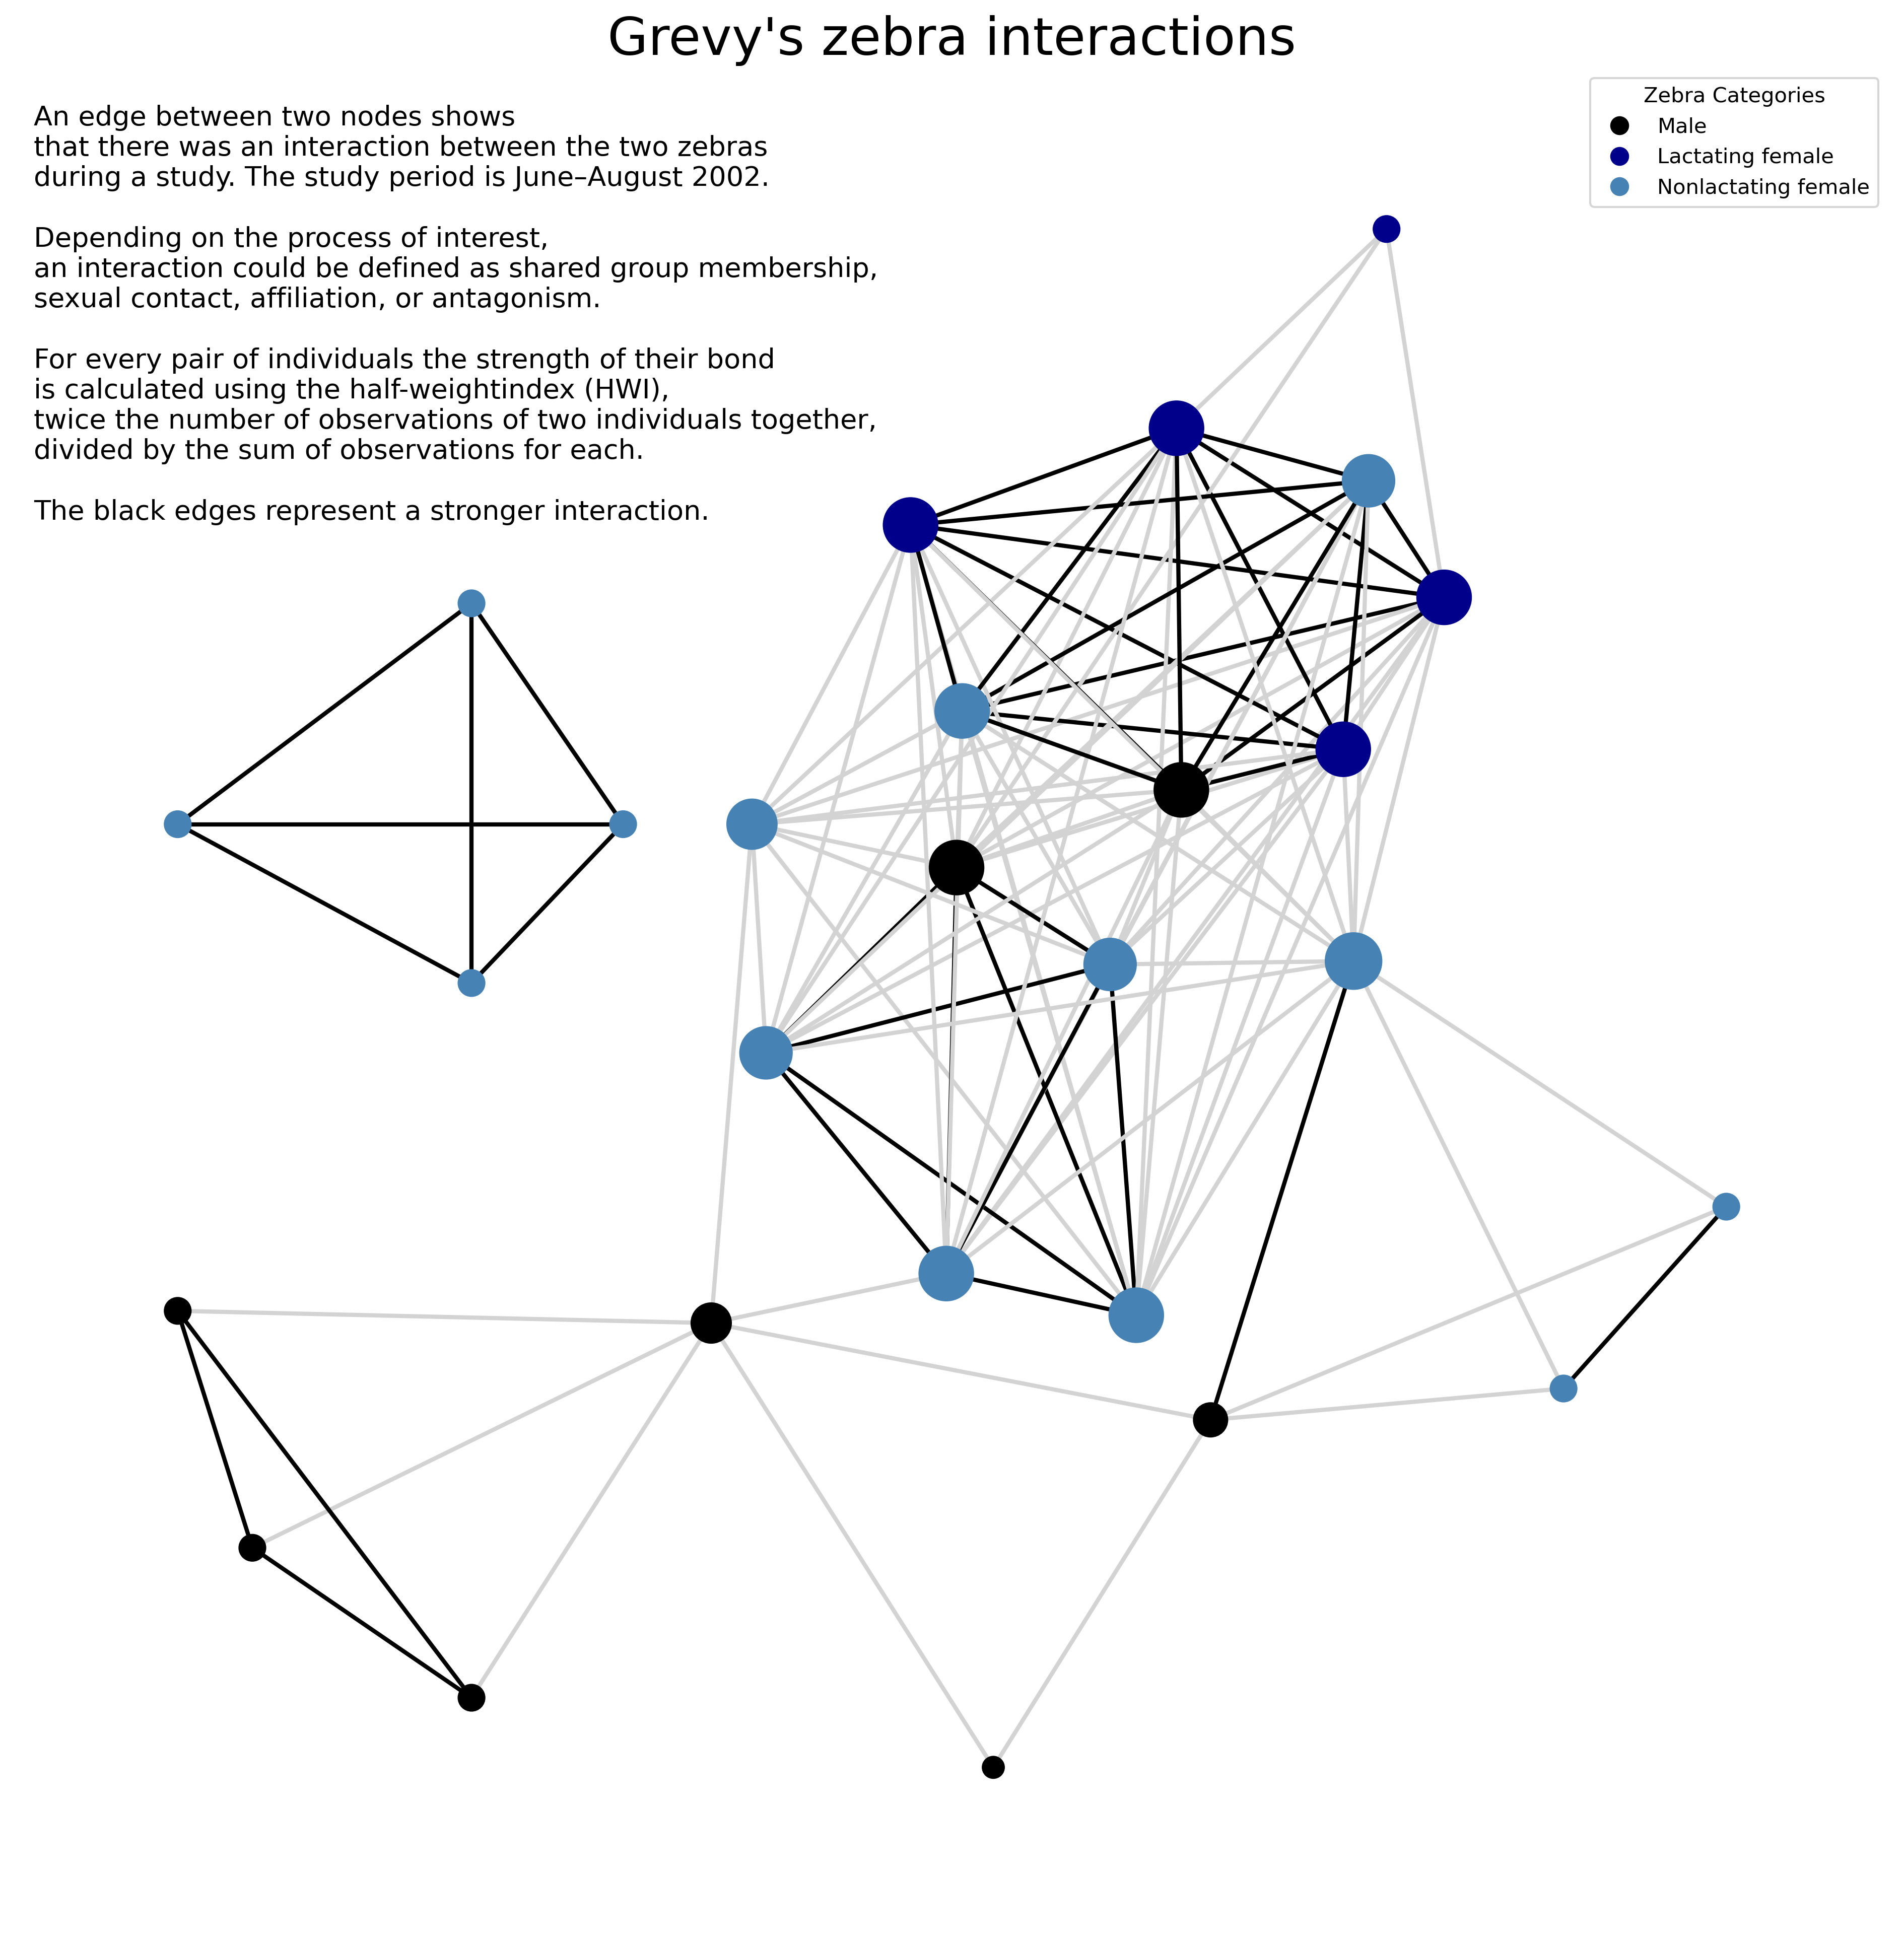

In [18]:

fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi = 300)
ax.set_title("Grevy's zebra interactions", fontsize=25)

# Use node_shapes_map in nx.draw_networkx_nodes
nx.draw_networkx_nodes(zebras_graph,
    pos=pos,
    node_size=node_size*50,
    node_color=node_colors,
    ax=ax
)

nx.draw_networkx_edges(
    zebras_graph,
    pos=pos,
    width=2,
    edge_color=edge_colors,
    alpha=1, # półprzezroczyste krawędzie
    ax=ax,
)

#for i, (node, (x, y)) in enumerate(pos.items()):
    #ax.text(x, y - 0.02, node, fontsize=15, ha="center", va="top")

# Create legend
unique_labels = set(zebras_nodes[' sex'])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors_dict[label], markersize=10, label=label.capitalize())
                  for label in unique_labels]

ax.legend(handles=legend_handles, loc='upper right', title='Zebra Categories')

ax.text(0.01, 0.98, 
"""An edge between two nodes shows 
that there was an interaction between the two zebras
during a study. The study period is June–August 2002. 

Depending on the process of interest, 
an interaction could be defined as shared group membership, 
sexual contact, affiliation, or antagonism. 

For every pair of individuals the strength of their bond 
is calculated using the half-weightindex (HWI), 
twice the number of observations of two individuals together, 
divided by the sum of observations for each.

The black edges represent a stronger interaction.
""", 
    fontsize=13, 
    transform=ax.transAxes,
    verticalalignment="top" ) # określamy bezwzględne współrzędne tekstu
plt.axis("off")
plt.show()